# Predictive Analytics: Kualitas Wine


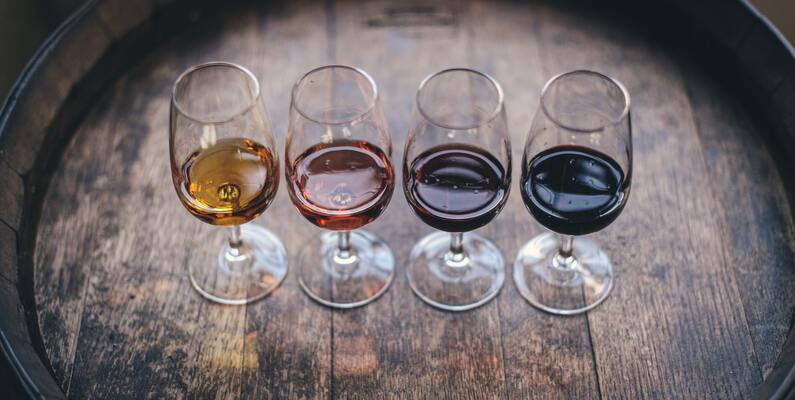


[Wine Dataset](https://www.kaggle.com/datasets/yasserh/wine-quality-dataset/data)

# Deskripsi Proyek :
# Deskripsi Latar Belakang Proyek Prediksi Kualitas Apel dengan Machine

Proyek ini bertujuan untuk mengembangkan model machine learning yang dapat memprediksi kualitas anggur merah (red wine) dengan lebih akurat dan efisien. Saat ini, penentuan kualitas anggur masih banyak dilakukan secara manual melalui uji rasa dan inspeksi fisik, yang memakan waktu, tenaga, serta rentan terhadap subjektivitas dan kesalahan manusia. Hal ini dapat menyebabkan inkonsistensi dalam proses penilaian kualitas, yang berdampak pada produsen, distributor, hingga konsumen akhir. Model prediksi kualitas anggur ini diharapkan mampu mengatasi permasalahan tersebut dengan menyediakan solusi otomatis yang lebih akurat, efisien, dan objektif. Dengan demikian, produsen dan distributor dapat meningkatkan konsistensi kualitas produk, meminimalkan kerugian, dan memberikan pengalaman yang lebih baik bagi konsumen.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import preprocessing
from google.colab import drive

In [2]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Load Data

In [3]:
import zipfile

zip_path = "/content/drive/MyDrive/mesin/wine/archive.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/drive/MyDrive/mesin/wine/")

df = pd.read_csv("/content/drive/MyDrive/mesin/wine/WineQT.csv")


In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
print("Jumlah baris dan kolom:", df.shape)

Jumlah baris dan kolom: (1143, 13)


# EDA (Exploratory Data Analysis)

**mengecek informasi dataset**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


**deskripsi statistik**

In [7]:
  df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


**mengecek mising value**

In [8]:
  pd.DataFrame({'Jumlah missing valueg':df.isna().sum()})

,Jumlah missing valueg
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


**mengecek data duplikat**

In [9]:
print("\nJumlah data duplikat:", df.duplicated().sum())


Jumlah data duplikat: 0


**Univariate Analysis**

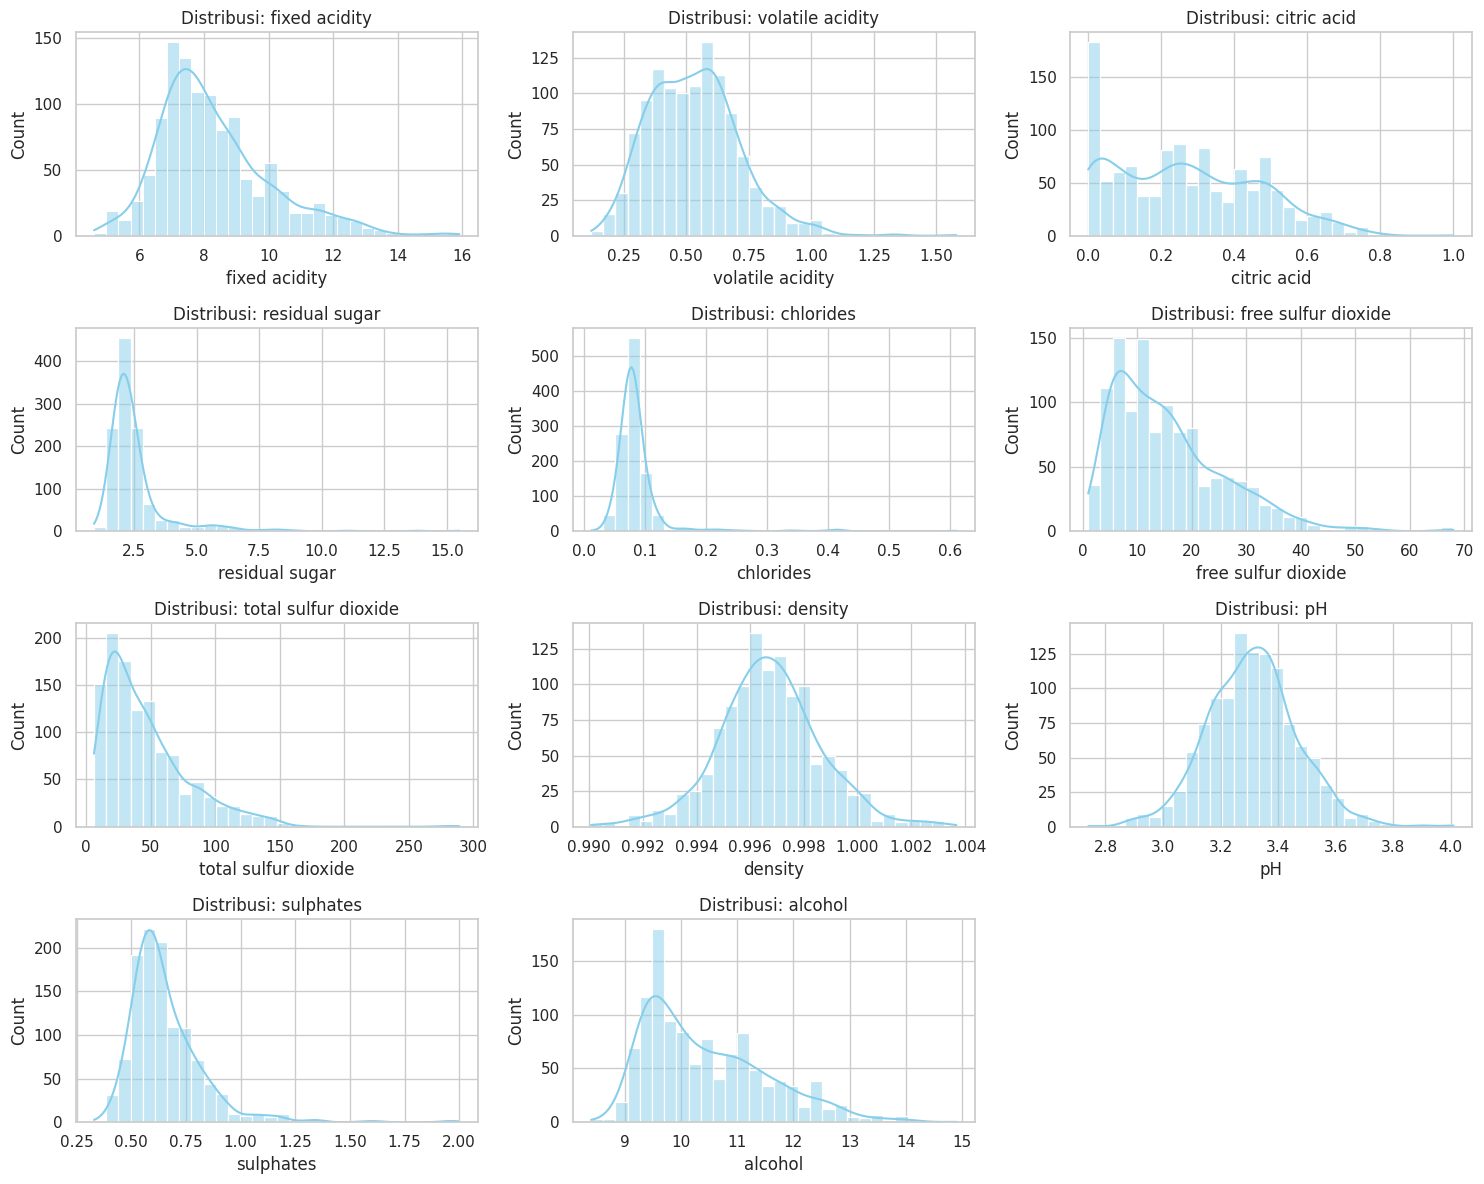

<ipython-input-10-f00cd843bc11>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='muted')


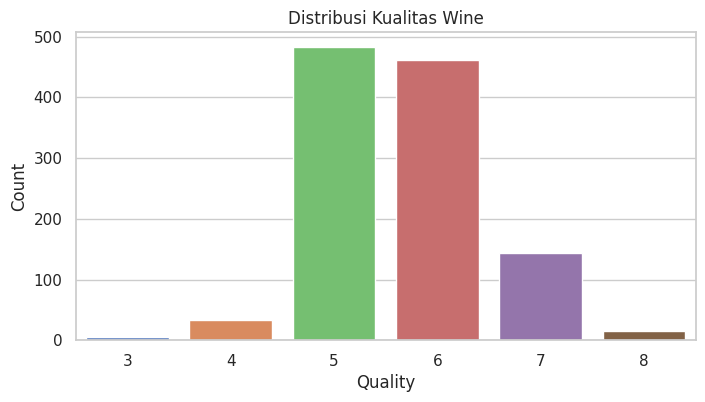

In [10]:
# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(15, 12))

# Plot histogram untuk setiap fitur numerik
for i, column in enumerate(df.columns[:-2], 1):  # Kecuali 'quality' dan 'Id'
    plt.subplot(4, 3, i)
    sns.histplot(df[column], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribusi: {column}')
    plt.tight_layout()

plt.show()

# Distribusi kualitas wine
plt.figure(figsize=(8, 4))
sns.countplot(x='quality', data=df, palette='muted')
plt.title('Distribusi Kualitas Wine')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()


**Multivariate Analysis**

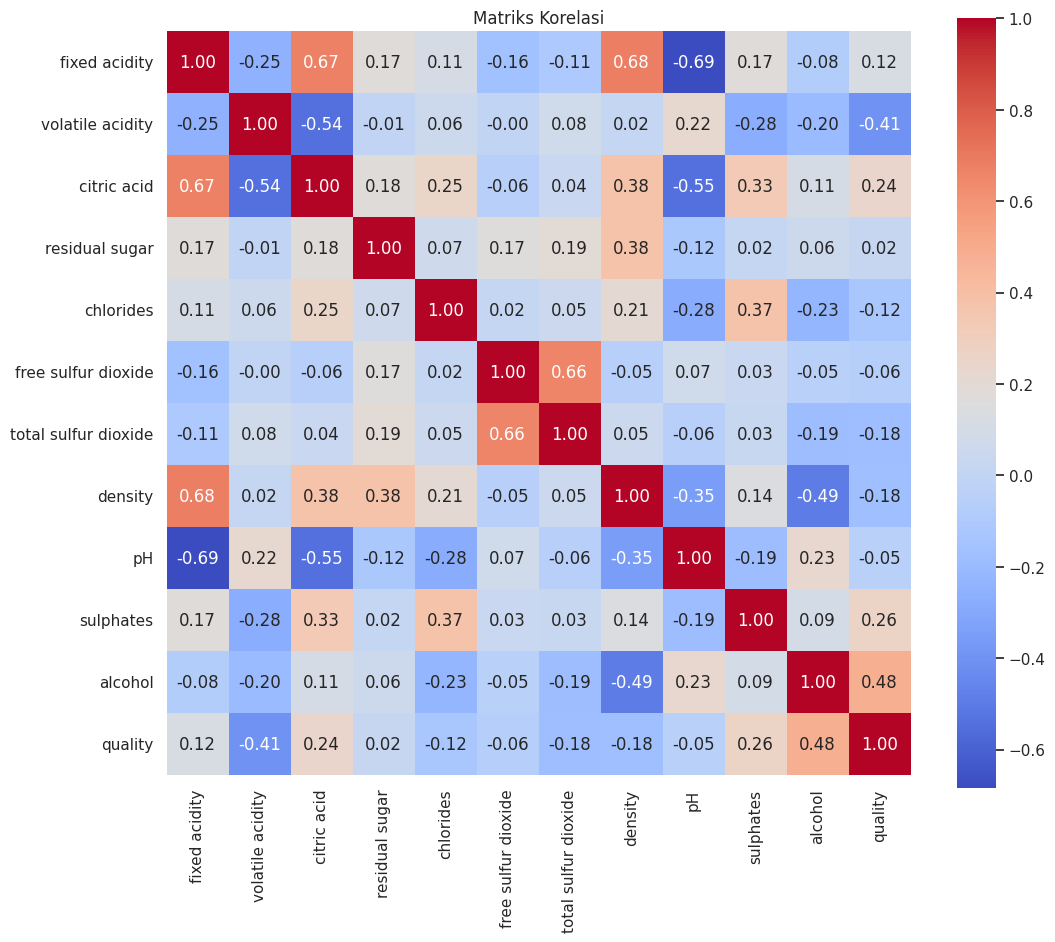

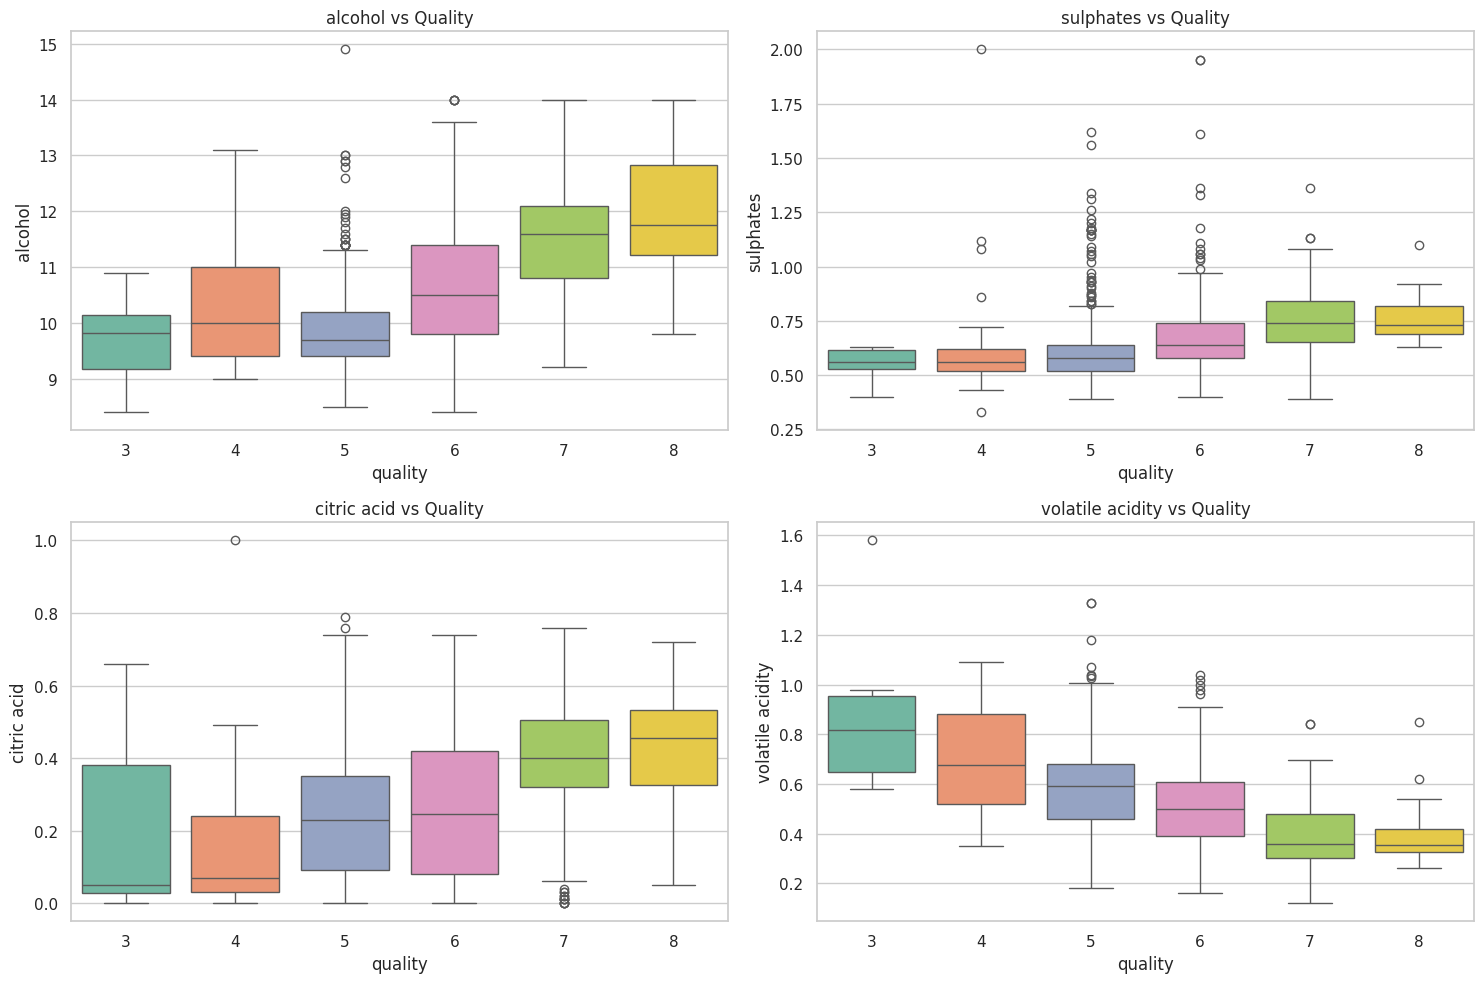

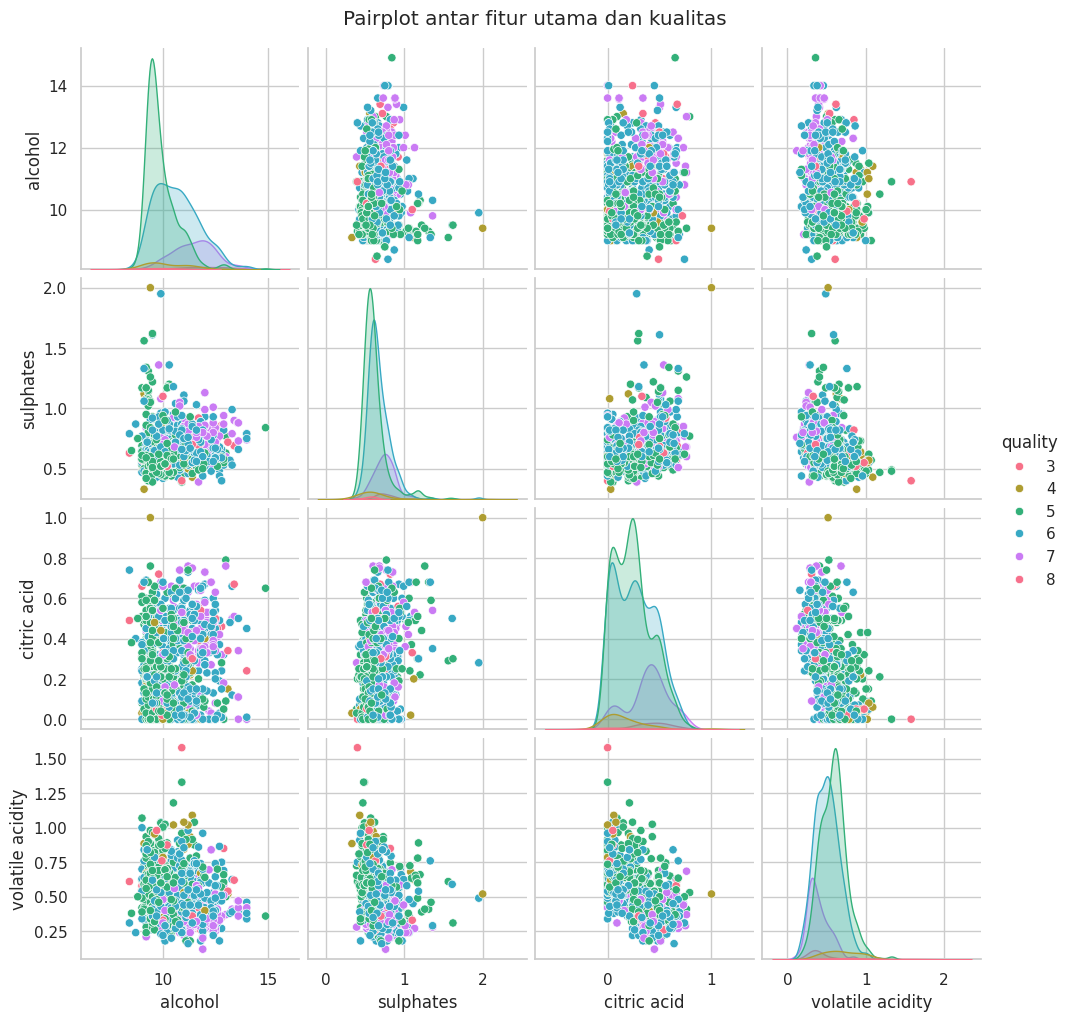

In [11]:
# Korelasi antar fitur
plt.figure(figsize=(12, 10))
correlation_matrix = df.drop('Id', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Matriks Korelasi")
plt.show()

# Scatterplot beberapa fitur terhadap kualitas
features_to_plot = ['alcohol', 'sulphates', 'citric acid', 'volatile acidity']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='quality', y=feature, data=df, hue='quality', palette='Set2', legend=False)
    plt.title(f'{feature} vs Quality')

plt.tight_layout()
plt.show()

# Pairplot untuk beberapa fitur terpilih
sns.pairplot(df[['alcohol', 'sulphates', 'citric acid', 'volatile acidity', 'quality']], hue='quality', palette='husl')
plt.suptitle("Pairplot antar fitur utama dan kualitas", y=1.02)
plt.show()


# Data Preparation


**Encoding Fitur Kategori**

In [12]:
# Cek apakah ada fitur kategorikal
cat_features = df.select_dtypes(include=['object', 'category']).columns

# Jika ada, encode ke angka
if len(cat_features) > 0:
    df = pd.get_dummies(df, columns=cat_features)

**Reduksi Dimensi dengan PCA**

In [13]:
# Buang kolom ID
df_prep = df.drop(columns=['Id'])

# Pisahkan fitur dan target
X = df_prep.drop('quality', axis=1)
y = df_prep['quality']

**Standarisasi**

In [14]:
# Standardisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**PCA**

In [15]:
# PCA untuk mencari jumlah komponen optimal
pca = PCA(n_components=0.95)  # Cukup untuk menjelaskan 95% varians
X_pca = pca.fit_transform(X_scaled)

# Cek berapa banyak komponen yang terpilih
print(f"Jumlah komponen PCA yang dipakai: {X_pca.shape[1]}")


Jumlah komponen PCA yang dipakai: 9


In [16]:
# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

# Modeling

**Logistic Regression**

In [17]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

🔹 Logistic Regression
Akurasi: 0.6462882096069869
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.72      0.78      0.75        97
           6       0.60      0.68      0.64        92
           7       0.47      0.31      0.38        29
           8       0.00      0.00      0.00         3

    accuracy                           0.65       229
   macro avg       0.30      0.30      0.29       229
weighted avg       0.61      0.65      0.62       229



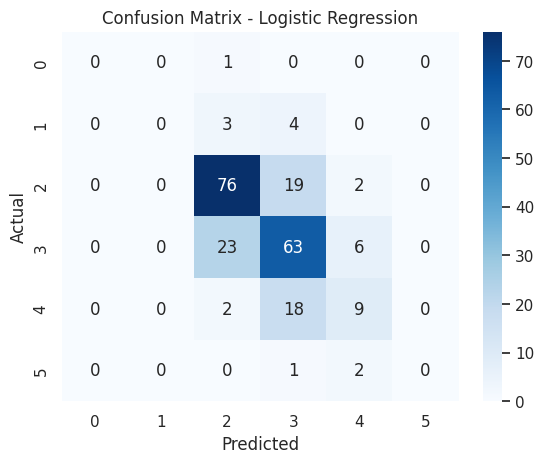

In [18]:
# Prediksi
y_pred_lr = lr.predict(X_test)

# Evaluasi
print("🔹 Logistic Regression")
print("Akurasi:", accuracy_score(y_test, y_pred_lr))

# Tambahkan zero_division=0 agar tidak muncul warning jika ada label yang tidak diprediksi
print(classification_report(y_test, y_pred_lr, zero_division=0))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [19]:
# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

🔹 K-Nearest Neighbors (KNN)
Akurasi: 0.5720524017467249
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.67      0.70      0.69        97
           6       0.52      0.58      0.55        92
           7       0.42      0.34      0.38        29
           8       0.00      0.00      0.00         3

    accuracy                           0.57       229
   macro avg       0.27      0.27      0.27       229
weighted avg       0.55      0.57      0.56       229



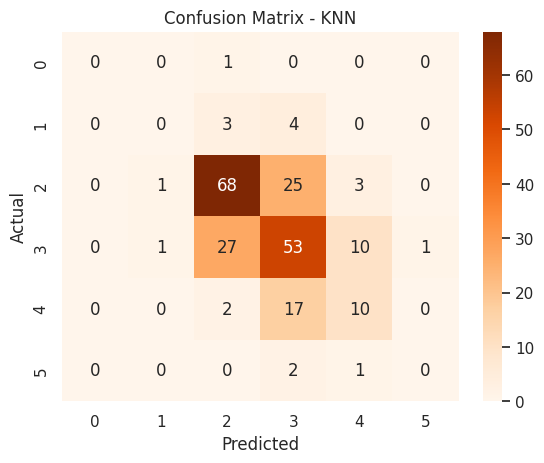

In [20]:
# Prediksi
y_pred_knn = knn.predict(X_test)

# Evaluasi
print("🔹 K-Nearest Neighbors (KNN)")
print("Akurasi:", accuracy_score(y_test, y_pred_knn))

# Perbaikan: tambahkan zero_division=0 untuk menghindari warning
print(classification_report(y_test, y_pred_knn, zero_division=0))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, cmap='Oranges', fmt='g')
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [21]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

🔹 Random Forest
Akurasi: 0.7117903930131004
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.74      0.84      0.79        97
           6       0.68      0.77      0.72        92
           7       0.69      0.38      0.49        29
           8       0.00      0.00      0.00         3

    accuracy                           0.71       229
   macro avg       0.35      0.33      0.33       229
weighted avg       0.68      0.71      0.69       229



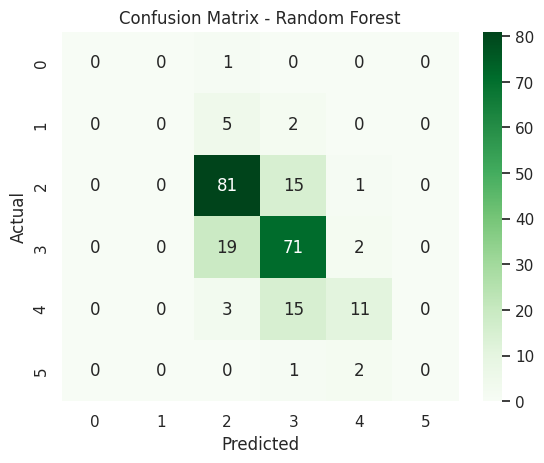

In [22]:
# Prediksi
y_pred_rf = rf.predict(X_test)

# Evaluasi
print("🔹 Random Forest")
print("Akurasi:", accuracy_score(y_test, y_pred_rf))

# Perbaikan: Tambahkan zero_division=0 agar tidak muncul warning
print(classification_report(y_test, y_pred_rf, zero_division=0))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap='Greens', fmt='g')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Evaluate Model

In [23]:
# Ringkasan akurasi model
model_names = ['Logistic Regression', 'KNN', 'Random Forest']
accuracies = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_rf)
]

summary_df = pd.DataFrame({'Model': model_names, 'Akurasi': accuracies})
print(summary_df.sort_values(by='Akurasi', ascending=False))


                 Model   Akurasi
2        Random Forest  0.711790
0  Logistic Regression  0.646288
1                  KNN  0.572052
